In [64]:
#All the imports needed for this linear regression module
import pandas
from pandas import DataFrame
import matplotlib.pyplot as pyplot

from sklearn.linear_model import LinearRegression

In [65]:
#Use Pandas to read our csv file
data = pandas.read_csv('cost_revenue_clean.csv')
data.describe() #Use this to describe the data set that we are using



,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [66]:
#Use this to read the csv file if you so choose.
print(data)

      production_budget_usd  worldwide_gross_usd
0                 1000000.0         2.600000e+01
1                   10000.0         4.010000e+02
2                  400000.0         4.230000e+02
3                  750000.0         4.500000e+02
4                   10000.0         5.270000e+02
5                 1800000.0         6.730000e+02
6                 1000000.0         7.030000e+02
7                 6600000.0         8.280000e+02
8                 1000000.0         8.840000e+02
9                    7000.0         9.000000e+02
10                2000000.0         9.260000e+02
11                1000000.0         1.036000e+03
12                 700000.0         1.160000e+03
13                 200000.0         1.217000e+03
14                9000000.0         1.242000e+03
15                  12000.0         1.336000e+03
16                   5000.0         1.338000e+03
17                 100000.0         1.358000e+03
18                1400000.0         1.632000e+03
19                 3

In [67]:
X = DataFrame(data, columns=['production_budget_usd'])
Y = DataFrame(data, columns=['worldwide_gross_usd'])

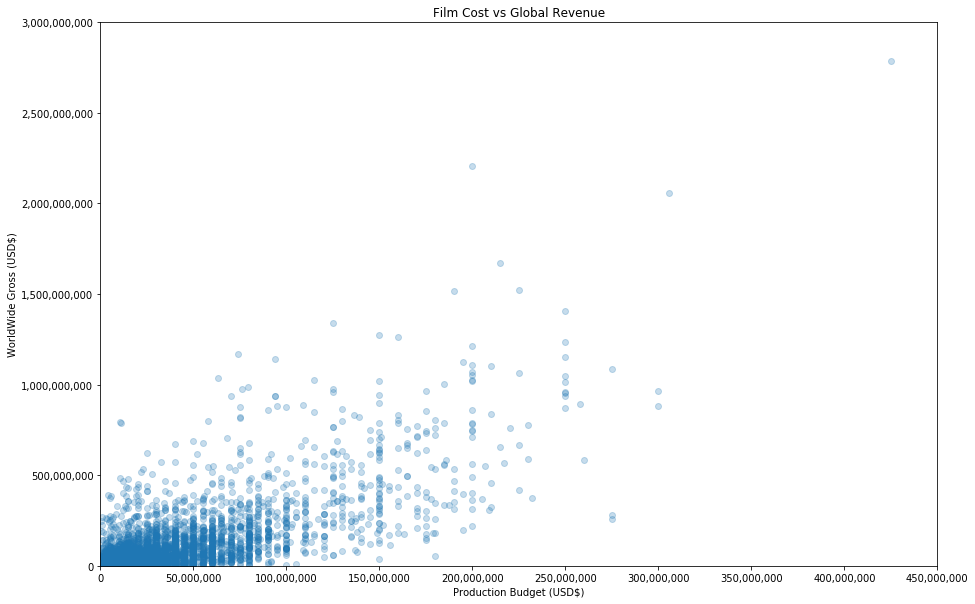

In [68]:
fig = pyplot.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

#fig, ax1 = pyplot.subplots()

ax1.scatter(X,Y, alpha=0.25)

pyplot.title('Film Cost vs Global Revenue')
ax1.set_xlabel('Production Budget (USD$)')
ax1.set_ylabel('WorldWide Gross (USD$)')
ax1.set_ylim(0, 3000000000)
ax1.set_xlim(0, 450000000)
#ax1.ticklabel_format(style='plain')
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
ax1.set_xticklabels(['{:,}'.format(int(x)) for x in ax1.get_xticks().tolist()])

#Chart before line that we used linear regression to find.
pyplot.show()

In [70]:
regression = LinearRegression()
regression.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
#Slope Coefficent
regression.coef_


array([[3.11150918]])

In [73]:
#Intercept
regression.intercept_


array([-7236192.72913963])

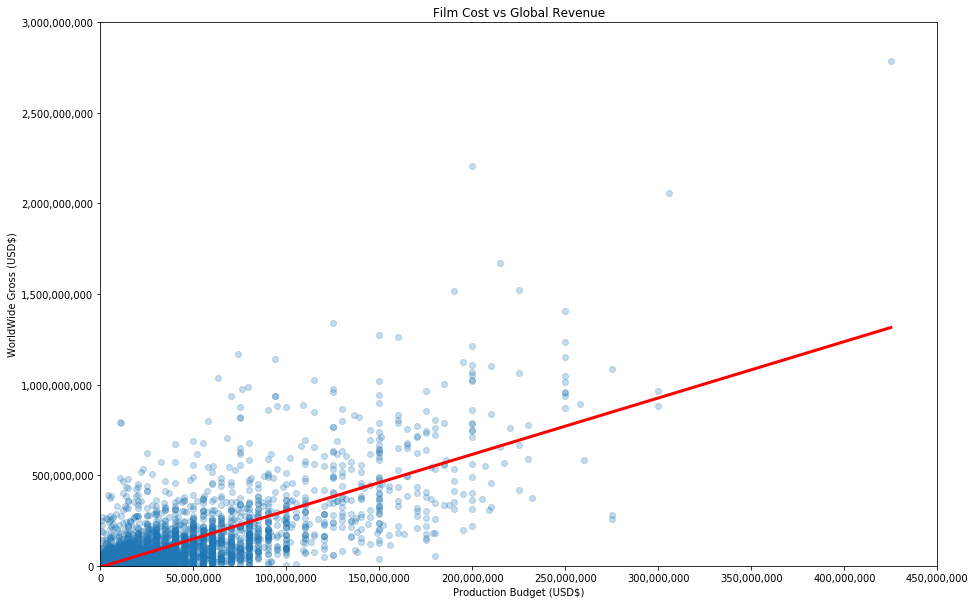

In [77]:
fig = pyplot.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

#fig, ax1 = pyplot.subplots()

ax1.scatter(X,Y, alpha=0.25)
ax1.plot(X, regression.predict(X), color='red', linewidth=3)
pyplot.title('Film Cost vs Global Revenue')
ax1.set_xlabel('Production Budget (USD$)')
ax1.set_ylabel('WorldWide Gross (USD$)')
ax1.set_ylim(0, 3000000000)
ax1.set_xlim(0, 450000000)
#ax1.ticklabel_format(style='plain')
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
ax1.set_xticklabels(['{:,}'.format(int(x)) for x in ax1.get_xticks().tolist()])


pyplot.show()

In [80]:
#Given the intercept, the predictions of the model not fitting on the extreme, and the overall clear lack of data fitting
#it's clear that this model doesn't do a good job of predicting anything. This is a "failed Linear Regression test"
#The given formula here would be
# Worldwide Gross = Intercept + (Slope Coefficent x Budget)
# Example 
# 303,913,807.3 = -7,236,192.70 + (3.1115 * 100,000,000)

In [81]:
#Theoretically this number implies that it explains about 54.9% of the model. This is most likely not true, but is what the
#model is showing. 
regression.score(X,Y)


0.5496485356985727